### 4_Sprint_4T01. Visualització gràfica d'un dataset
#### Eloi Canals

In [11]:
import pandas as pd
import matplotlib.pyplot as plt #, mpld3
import numpy as np

import mpld3

delfli = pd.read_csv('DelayedFlights.csv', index_col=0)


/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Exercici 1. Visualització variable categorica (UniqueCarrier)

In [12]:
Totals_x_carrier = delfli.UniqueCarrier.value_counts()

carriers = pd.read_csv('AirlineCodesIATA.csv', index_col=0)

to_keep_c = ['Airline']
carriers_ok=carriers[to_keep_c]

# Borrar index duplicats
carriers_ok = carriers_ok[~carriers_ok.index.duplicated()]
newidx = carriers_ok.reindex()

myDic = carriers_ok.to_dict()

Totals_x_carrier.index = Totals_x_carrier.index.map(myDic['Airline'])

Totals_x_carrier.count()

20

In [13]:
# prova inicial
#plt.plot(Totals_x_carrier)


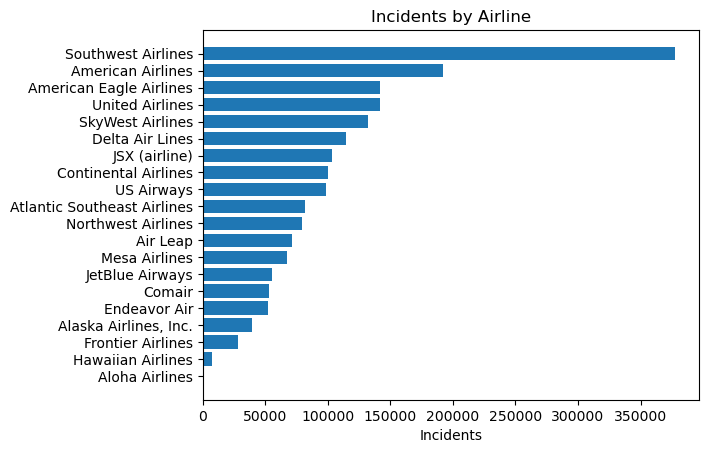

In [14]:
plt.rcdefaults()
fig, ax = plt.subplots()

# data
people = Totals_x_carrier.index
y_pos = np.arange(Totals_x_carrier.count())

ax.barh(y_pos, Totals_x_carrier, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Incidents')
ax.set_title('Incidents by Airline')

plt.savefig("Ex_1_1.svg")
plt.savefig("Ex_1_1.png")

plt.show()


mpld3.save_html(fig,"Ex_1_1.html")

#### Exercici 1. Visualització d'una variable numèrica (ArrDelay)

In [15]:
Arrivals_delays_1 = delfli.groupby("Month")["ArrDelay"].count()

Arrivals_delays_1

Month
1     182915
2     188625
3     200116
4     154783
5     152711
6     199888
7     182171
8     161974
9      95351
10    103181
11    105148
12    201508
Name: ArrDelay, dtype: int64

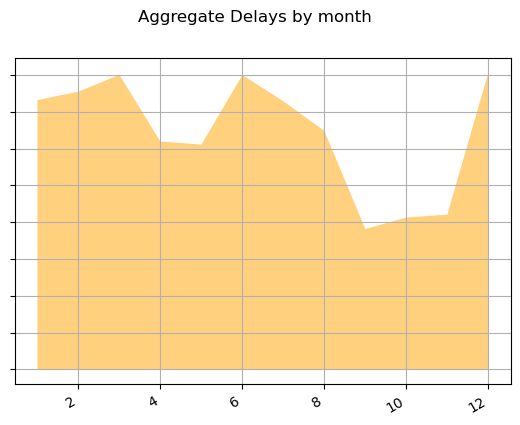

In [16]:
fig, ax2 = plt.subplots()

myx = Arrivals_delays_1.index

ax2.fill_between(myx, Arrivals_delays_1 , facecolor='orange', alpha=0.5)

ax2.grid(True)

for label in ax2.get_yticklabels():
    label.set_visible(False)

fig.suptitle('Aggregate Delays by month')
fig.autofmt_xdate()

fig.savefig("Ex_1_2.svg")
fig.savefig("Ex_1_2.png")
mpld3.save_html(fig,"Ex_1_2.html")

#### Exercici 1. Visualització Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

In [17]:
Arrivals_delays = delfli.groupby("UniqueCarrier")["ArrDelay"].count()
#Arrivals_delays = delfli.ArrDelay.value_counts()

Arrivals_delays


UniqueCarrier
9E     51569
AA    190910
AQ       744
AS     39010
B6     54925
CO     99731
DL    113728
EV     81762
F9     28224
FL     70969
HA      7472
MQ    141223
NW     78843
OH     52453
OO    131780
UA    140904
US     98007
WN    376201
XE    103147
YV     66769
Name: ArrDelay, dtype: int64

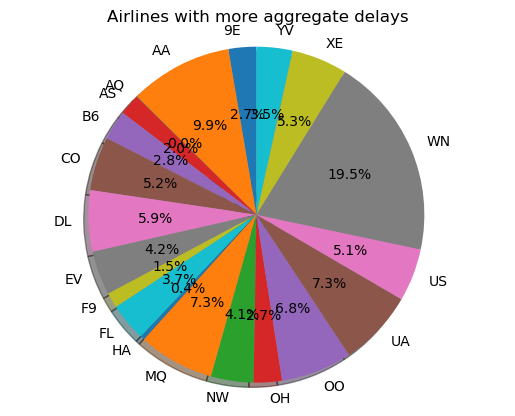

In [18]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = Arrivals_delays.index
myDelays = Arrivals_delays
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(myDelays, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title('Airlines with more aggregate delays')

plt.savefig("Ex_1_3.svg")
plt.savefig("Ex_1_3.png")

plt.show()

mpld3.save_html(fig1,"Ex_1_3.html")

#### Exercici 1. Visualització Dues variables numèriques (ArrDelay i DepDelay)

(array([1.816632e+06, 1.016480e+05, 1.429800e+04, 2.642000e+03,
        6.800000e+02, 2.930000e+02, 2.120000e+02, 1.530000e+02,
        9.700000e+01, 6.200000e+01, 2.500000e+01, 6.000000e+00,
        6.000000e+00, 1.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 2.000000e+00]),
 array([   6.  ,  129.05,  252.1 ,  375.15,  498.2 ,  621.25,  744.3 ,
         867.35,  990.4 , 1113.45, 1236.5 , 1359.55, 1482.6 , 1605.65,
        1728.7 , 1851.75, 1974.8 , 2097.85, 2220.9 , 2343.95, 2467.  ]),
 <BarContainer object of 20 artists>)

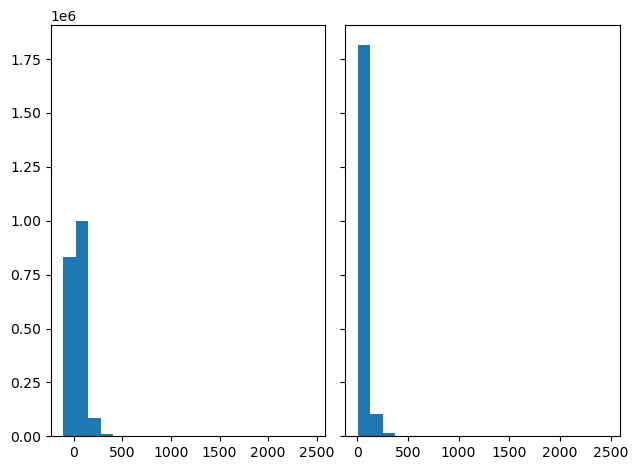

In [19]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = delfli['ArrDelay']
y = delfli['DepDelay']

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

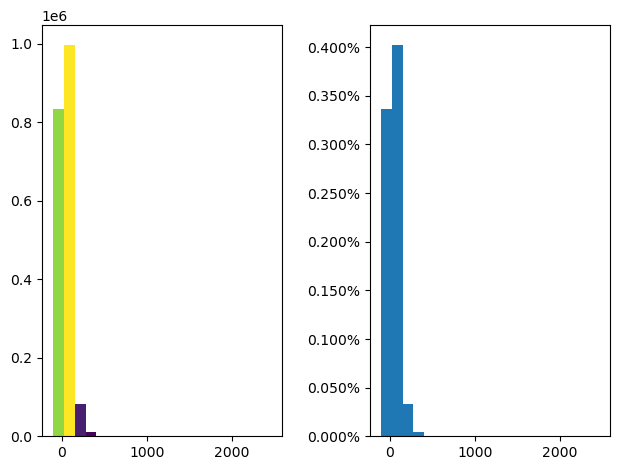

In [20]:
fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))


plt.savefig("Ex_1_4.svg")
plt.savefig("Ex_1_4.png")
mpld3.save_html(fig,"Ex_1_4.html")

#### Exercici 1. Visualització de Tres variables (ArrDelay, DepDelay i UniqueCarrier)

In [21]:
All_delays = delfli.groupby("UniqueCarrier")["ArrDelay","DepDelay"].count()
#Arrivals_delays = delfli.ArrDelay.value_counts()

labels = Arrivals_delays.index
All_delays

<ipython-input-21-e88e57ed38a3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  All_delays = delfli.groupby("UniqueCarrier")["ArrDelay","DepDelay"].count()


,ArrDelay,DepDelay
UniqueCarrier,,
9E,51569,51885
AA,190910,191865
AQ,744,750
AS,39010,39293
B6,54925,55315
CO,99731,100195
DL,113728,114238
EV,81762,81877
F9,28224,28269


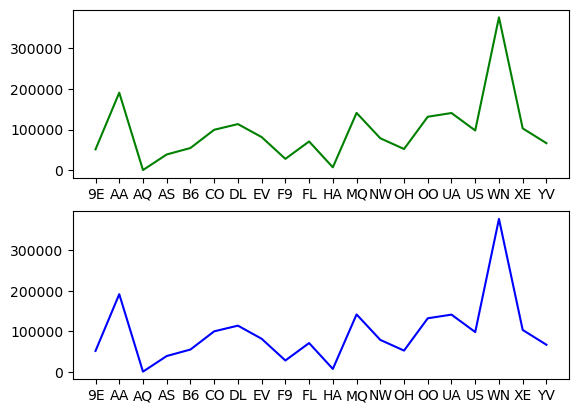

In [22]:
x = All_delays.index
y1 = All_delays["ArrDelay"]
y2 = All_delays["DepDelay"]

plt.grid()

plt.title('Aggregate Delays by Airline')
plt.xlabel("Airlines")
plt.ylabel("Agreggate time delays")

plt.subplot(2, 1, 1)
plt.plot(x,y1, c = 'Green')

plt.subplot(2, 1, 2)
plt.plot(x,y2, c = 'blue')

plt.savefig("Ex_1_5.svg")
plt.savefig("Ex_1_5.png")

plt.show()

mpld3.save_html(fig,"Ex_1_5.html")

#### Exercici 1. Visualització de Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

In [8]:
delays_plus_airtime = delfli.groupby("UniqueCarrier")["ArrDelay","DepDelay","AirTime"].count()
delays_plus_airtime

<ipython-input-8-95e6ecc45c88>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  delays_plus_airtime = delfli.groupby("UniqueCarrier")["ArrDelay","DepDelay","AirTime"].count()


,ArrDelay,DepDelay,AirTime
UniqueCarrier,,,
9E,51569,51885,51569
AA,190910,191865,190910
AQ,744,750,744
AS,39010,39293,39010
B6,54925,55315,54925
CO,99731,100195,99731
DL,113728,114238,113728
EV,81762,81877,81762
F9,28224,28269,28224


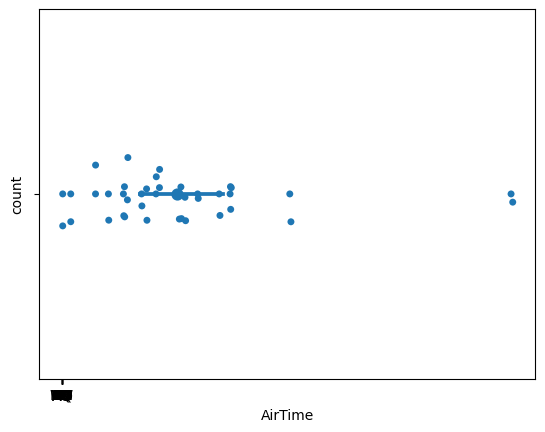

In [9]:
import seaborn as sns

sns.countplot(x=delays_plus_airtime.index,data=delays_plus_airtime)
sns.swarmplot(x="ArrDelay",data=delays_plus_airtime)
sns.stripplot(x="DepDelay",data=delays_plus_airtime)
sns.pointplot(x="AirTime",data=delays_plus_airtime)


plt.savefig("Ex_1_6.svg")
plt.savefig("Ex_1_6.png")

plt.show()

mpld3.save_html(fig,"Ex_1_6.html")

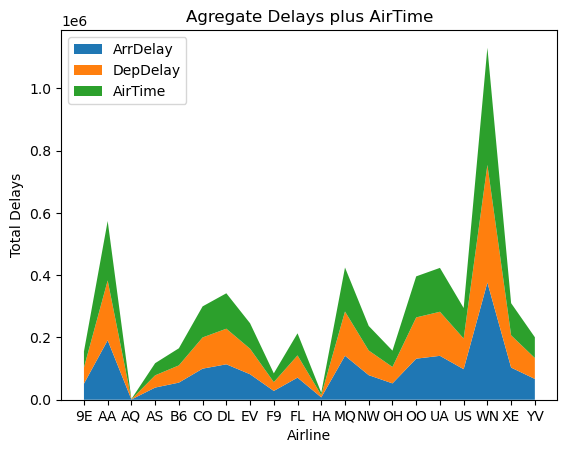

/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/mpld3/mplexporter/utils.py:68: UserWarning: line style '(0.0, None)' not understood: defaulting to solid line.
  warnings.warn("line style '{0}' not understood: "


In [10]:
airlines = delays_plus_airtime.index
All3Delays = {
    'ArrDelay': delays_plus_airtime["ArrDelay"],
    'DepDelay': delays_plus_airtime["DepDelay"],
    'AirTime': delays_plus_airtime["AirTime"],
}

fig, ax = plt.subplots()
ax.stackplot(airlines, All3Delays.values(),
             labels=All3Delays.keys())
ax.legend(loc='upper left')
ax.set_title('Agregate Delays plus AirTime')
ax.set_xlabel('Airline')
ax.set_ylabel('Total Delays')

plt.savefig("Ex_1_7.svg")
plt.savefig("Ex_1_7.png")

plt.show()

mpld3.save_html(fig,"Ex_1_7.html")